In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
#     -O /tmp/irish-lyrics-eof.txt

In [4]:
tokenizer = Tokenizer()

data = open('./irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index, '\n')
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] # len(xs) = len(ys) 12038

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [7]:
print(xs[6], '\n')
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2] 

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(xs[5], '\n')
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2] 

[0. 0. 0. ... 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# earlystop = EarlyStopping(monitor='accuracy', min_delta=0.5, patience=70, verbose=1, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1) # callbacks=earlystop
print(model.summary(), '\n')
print(model)

Epoch 1/100
377/377 [==============================] - 7s 19ms/step - loss: 6.6574 - accuracy: 0.0724
Epoch 2/100
377/377 [==============================] - 7s 19ms/step - loss: 5.7529 - accuracy: 0.1175
Epoch 3/100
377/377 [==============================] - 7s 19ms/step - loss: 4.8900 - accuracy: 0.1613
Epoch 4/100
377/377 [==============================] - 7s 19ms/step - loss: 3.9944 - accuracy: 0.2321
Epoch 5/100
377/377 [==============================] - 7s 19ms/step - loss: 3.2938 - accuracy: 0.3221
Epoch 6/100
377/377 [==============================] - 7s 19ms/step - loss: 2.6185 - accuracy: 0.4163
Epoch 7/100
377/377 [==============================] - 7s 20ms/step - loss: 2.0117 - accuracy: 0.5368
Epoch 8/100
377/377 [==============================] - 7s 19ms/step - loss: 1.6656 - accuracy: 0.6022
Epoch 9/100
377/377 [==============================] - 7s 19ms/step - loss: 1.4354 - accuracy: 0.6585
Epoch 10/100
377/377 [==============================] - 7s 19ms/step - loss: 1.269

377/377 [==============================] - 7s 19ms/step - loss: 0.9096 - accuracy: 0.7726
Epoch 81/100
377/377 [==============================] - 7s 19ms/step - loss: 0.8802 - accuracy: 0.7777
Epoch 82/100
377/377 [==============================] - 7s 19ms/step - loss: 0.8267 - accuracy: 0.7921
Epoch 83/100
377/377 [==============================] - 7s 19ms/step - loss: 0.8267 - accuracy: 0.7912
Epoch 84/100
377/377 [==============================] - 7s 19ms/step - loss: 0.9113 - accuracy: 0.7716
Epoch 85/100
377/377 [==============================] - 7s 19ms/step - loss: 1.0764 - accuracy: 0.7348
Epoch 86/100
377/377 [==============================] - 7s 19ms/step - loss: 1.0940 - accuracy: 0.7366
Epoch 87/100
377/377 [==============================] - 7s 19ms/step - loss: 1.1945 - accuracy: 0.7119
Epoch 88/100
377/377 [==============================] - 7s 19ms/step - loss: 1.1484 - accuracy: 0.7121
Epoch 89/100
377/377 [==============================] - 7s 19ms/step - loss: 1.0263 - 

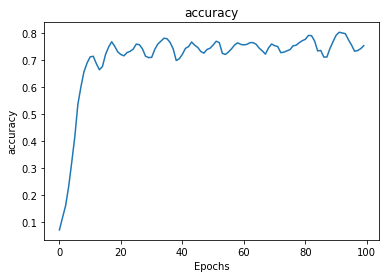

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [11]:
model.save('irish_lyrics.h5')

In [12]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this noon the sash is torn away and you come again gone by tomorrow love you know me connaught round the night eyes of it was upon them easy sons away city night again began abusing free invitation vain now and heres her renown land down without corporal love and die in keep we bay again faces drawn dying under back back when summers gone by mooncoin gone fair in the magic they march with faces gone and gone by river and toome today gone all their way to dublin whack fol all raked and city but make him straight in
